In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import numpy as np
import operator

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from nltk.probability import FreqDist
#os.chdir("drive/My Drive/winequality")
files = "winequality-red.csv"
files_2 = "winequality-white.csv"

In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

In [1]:
def accuracy(pred,ref):
  acc = 0
  for a,b in zip(pred,ref):
    if a==b:
      acc +=1
    else:
      pass
  return (acc/len(pred))*100

In [4]:
content = []

with open(files) as f: 
  for line in f:
    line = re.sub("(\n)","",line)
    content.append(line.split(';'))

In [34]:
columns = ["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
red_wine_df = pd.DataFrame(content, columns = columns)
red_wine_df.drop([0], inplace = True)

main_var = red_wine_df['quality']

red_wine_df.sample(frac= 1.0)
train_red_wine_df, test_red_wine_df = train_test_split(red_wine_df, random_state= 32, test_size= 0.2, stratify = main_var)

train_red_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
431,10.5,0.24,0.47,2.1,0.066,6,24,0.9978,3.15,0.9,11,7
522,7.6,0.41,0.49,2,0.088,16,43,0.998,3.48,0.64,9.1,5
227,8.9,0.59,0.5,2,0.337,27,81,0.9964,3.04,1.61,9.5,6
335,7.9,0.65,0.01,2.5,0.078,17,38,0.9963,3.34,0.74,11.7,7
752,8.3,0.65,0.1,2.9,0.089,17,40,0.99803,3.29,0.55,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1514,6.4,0.56,0.15,1.8,0.078,17,65,0.99294,3.33,0.6,10.5,6
1555,6.6,0.855,0.02,2.4,0.062,15,23,0.99627,3.54,0.6,11,6
374,7.4,0.55,0.22,2.2,0.106,12,72,0.9959,3.05,0.63,9.2,5
1484,8.1,0.33,0.44,1.5,0.042,6,12,0.99542,3.35,0.61,10.7,5


In [4]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1599 non-null   object
 1   volatile acidity      1599 non-null   object
 2   citric acid           1599 non-null   object
 3   residual sugar        1599 non-null   object
 4   chlorides             1599 non-null   object
 5   free sulfur dioxide   1599 non-null   object
 6   total sulfur dioxide  1599 non-null   object
 7   density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   sulphates             1599 non-null   object
 10  alcohol               1599 non-null   object
 11  quality               1599 non-null   object
dtypes: object(12)
memory usage: 150.0+ KB


<AxesSubplot:xlabel='quality', ylabel='Count'>

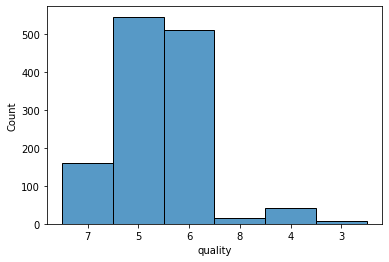

In [35]:
sns.histplot(train_red_wine_df['quality'])

Train set is unbalanced. Wines with quality 3,4,8 and 7 have less examples while wines with quality 5,6 have a lot of examples. Options are oversample,undersample or augment the training data.

In [40]:
x_ = train_red_wine_df.drop(columns="quality", axis = 1)
y_ = train_red_wine_df['quality']

#Oversampling with Smote generates noisy data
sm = SMOTEENN()
new_x,new_y = sm.fit_resample(x_,y_)

<AxesSubplot:xlabel='quality', ylabel='Count'>

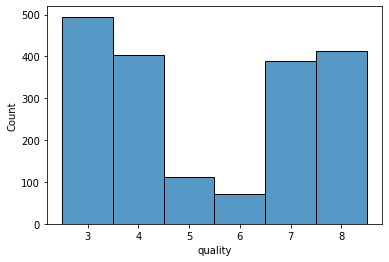

In [41]:
sns.histplot(new_y)

In [42]:
len(train_red_wine_df), len(new_y)

(1279, 1885)

/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='density'>

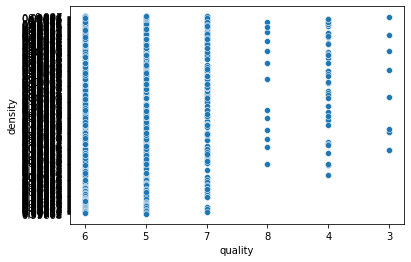

In [6]:
sns.scatterplot(train_red_wine_df['quality'],train_red_wine_df['density'])

In [7]:
train_red_wine_df = train_red_wine_df.sort_values(by = "quality")

<AxesSubplot:>

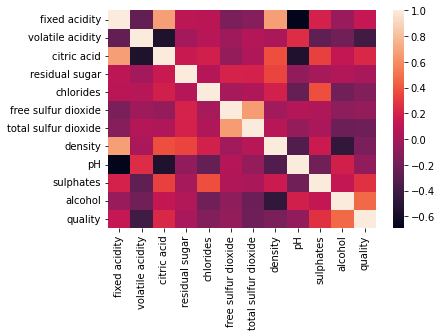

In [8]:
sns.heatmap(train_red_wine_df.astype(float).corr())

Reducing the number of considered features. 

- pH can be representative of the alcohol present
- inverse relationship between pH and fixed acidity
- fixed acidity and citric acidity is similar
- inverse relationship between volatile acidity and citric acid.
- alcohol and density are inverse
- Value of quality looks related to quality
- free sulfur dioxide looks related to total sulfur oxide

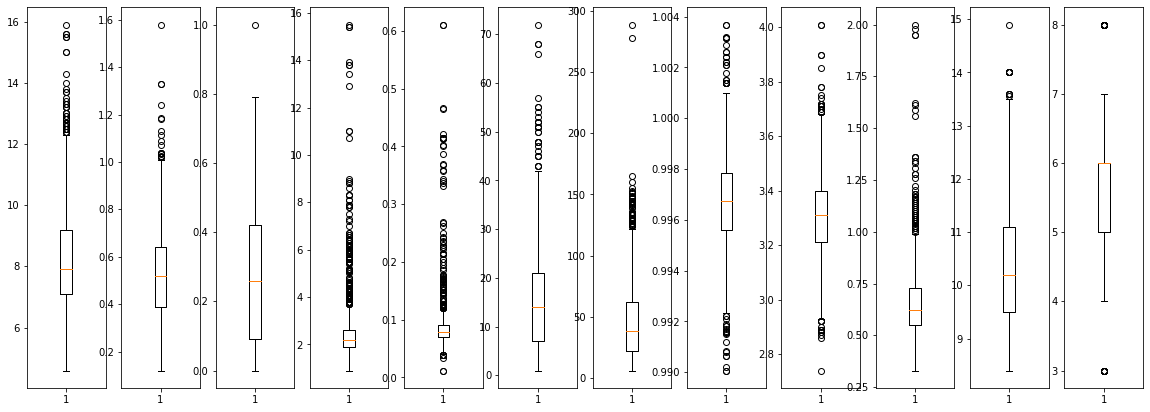

In [9]:
fig,ax = plt.subplots(1,len(columns), figsize = (20,7))

for i,item in enumerate(columns):
    ax[i].boxplot(red_wine_df[item].astype(float))
    #ax[i].xlabel(item)

In [10]:
test_red_wine_df['quality']

349     6
424     7
852     5
755     6
1261    5
       ..
524     5
1000    6
303     5
110     5
20      6
Name: quality, Length: 320, dtype: object

In [11]:
SS = StandardScaler()

#Train data
SS_train_red_wine_df = SS.fit_transform(train_red_wine_df)
SS_train_red_wine_df = pd.DataFrame(SS_train_red_wine_df, columns = columns)

SS_train_red_wine_df['quality'] = train_red_wine_df['quality']
SS_train_red_wine_df.dropna(inplace=True)

#Test data
SS_test_red_wine_df = SS.fit_transform(test_red_wine_df)
SS_test_red_wine_df = pd.DataFrame(test_red_wine_df, columns= columns)

SS_test_red_wine_df['quality'] = test_red_wine_df['quality']
SS_test_red_wine_df.dropna(inplace = True)



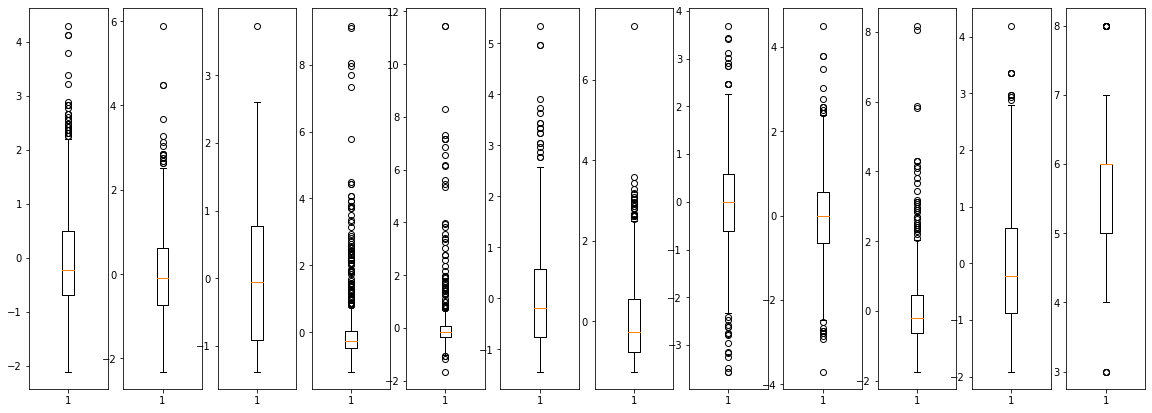

In [12]:
fig,ax_1 = plt.subplots(1,len(columns), figsize = (20,7))

for i,item in enumerate(columns):
    ax_1[i].boxplot(SS_train_red_wine_df[item].astype(float))
    #ax[i].xlabel(item)

This indicates that from the density alone of the wine does not determine the quality

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)

#decomposing certain amount of data
new_columns = ['residual sugar',"chlorides","free sulfur dioxide", "total sulfur dioxide", "pH", "sulphates", 'quality','alcohol']
new_columns_2 = ['volatile acidity', 'residual sugar',"chlorides", "pH", "sulphates", 'quality','alcohol','fixed acidity', 'citric acid']
new_columns_3 = ['volatile acidity', "pH", "free sulfur dioxide", "total sulfur dioxide", 'quality','alcohol','fixed acidity', 'citric acid']

#decomposed citric acidity, density, fixed acidity for train data
acidity_decomp = pca.fit_transform(SS_train_red_wine_df, y = [new_columns])
sulfur_decomp = pca.fit_transform(SS_train_red_wine_df, y = [new_columns_2])
non_metals_decomp = pca.fit_transform(SS_train_red_wine_df, y = [new_columns_3])

#decomposed citric acidity, density, fixed acidity for test data
acidity_decomp_1 = pca.fit_transform(SS_test_red_wine_df, y = [new_columns])
sulfur_decomp_1 = pca.fit_transform(SS_test_red_wine_df, y = [new_columns_2])
non_metals_decomp_1 = pca.fit_transform(SS_test_red_wine_df, y = [new_columns_3])

SS_train_red_wine_df = SS_train_red_wine_df[new_columns]

#Re creating train dataframe with decomped data
SS_train_red_wine_df['acidity_decomp'] = acidity_decomp
SS_train_red_wine_df['sulfur_decomp'] = sulfur_decomp
SS_train_red_wine_df['non_metals_decomp'] = non_metals_decomp

SS_test_red_wine_df = SS_test_red_wine_df[new_columns]

#Re creating test dataframe with decomped data
SS_test_red_wine_df['acidity_decomp'] = acidity_decomp_1
SS_test_red_wine_df['sulfur_decomp'] = sulfur_decomp_1
SS_test_red_wine_df['non_metals_decomp'] = non_metals_decomp_1

In [41]:
y_train = np.array(SS_train_red_wine_df['quality'])
x_train = np.array(SS_train_red_wine_df[["pH", "alcohol", "acidity_decomp", "sulfur_decomp", "non_metals_decomp"]])

y_test = np.array(SS_test_red_wine_df['quality'])
x_test = np.array(SS_test_red_wine_df[["pH", "alcohol", "acidity_decomp", "sulfur_decomp", "non_metals_decomp"]])

In [42]:
def conv(a):
    out = {'3': 0, '4': 1, '5': 2, '6' : 3, '7': 4, '8': 5}
    return out.get(a) 

y_test = [conv(x) for x in y_test]; y_test = np.array(y_test)
y_train = [conv(x) for x in y_train]; y_train = np.array(y_train)

**Linear Model**

WITH STANDARDIZED COLUMNS

In [46]:
size = [0.5,0.4,0.3,0.2,0.1] #varying test and train_size
yvalues_test = {}; intercept = {}; predictions = {}; coeff = {}; xvalues_test = {}; rmse = {}
lr_model = LinearRegression()

current = 1

#x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = current)
lr_model.fit(x_train,y_train)
w = lr_model.coef_; b = lr_model.intercept_; coeff[current] = w; intercept[current] = b

#predict output based on this model
predictions = lr_model.predict(x_test)


#predictions = np.round(predictions)
#predictions = np.int0(predictions)

In [44]:
mse_lr = {}; mae_lr = {}; rmse_lr = {}; acc = {}

mse_lr[current] = metrics.mean_squared_error(predictions, y_test)
mae_lr[current] = metrics.mean_absolute_error(predictions, y_test)
rmse_lr[current] = np.sqrt(metrics.mean_absolute_error(predictions, y_test))
acc[current] = metrics.accuracy_score(predictions, y_test)

In [47]:
predictions, np.array(y_test)

(array([3.09850076, 2.80676465, 2.82714131, 2.92529003, 3.09698316,
        3.11194979, 3.06010416, 3.11158948, 3.81851169, 3.14410494,
        2.94342968, 2.79500065, 2.84747642, 2.90554556, 3.07385098,
        3.1911706 , 2.90461354, 3.28785886, 3.22247639, 3.21483153,
        3.10174058, 3.10078383, 3.13038978, 2.96235965, 3.17104403,
        3.05703053, 3.03856283, 2.97706467, 3.6386153 , 4.21709629,
        3.13649098, 3.04908603, 3.02839972, 3.050867  , 2.93476588,
        3.0267562 , 2.9365431 , 3.16429936, 3.11740555, 2.98447247,
        2.90555768, 3.09246772, 3.02177756, 3.01004347, 3.35165837,
        2.86851451, 3.18625206, 3.1579427 , 2.78639432, 2.94237828,
        3.40262162, 4.09525815, 3.21194409, 3.12104482, 3.00509407,
        3.21277254, 3.04434703, 3.10321885, 2.94615071, 2.88251486,
        3.10734582, 3.0685496 , 3.05356078, 2.80935425, 2.81815309,
        3.08971753, 3.09024763, 3.6394542 , 3.06093331, 3.34172281,
        2.87245545, 2.98489624, 2.92071052, 2.68

Linear Model gives result without bounds. It may be better to model this as a multi-class classification instead of a linear model. Using XGBoost on Linear Models 

XGBOOST WITH CROSS VALIDATION

SPLIT,SHUFFLE

In [48]:
from xgboost import XGBRegressor, XGBClassifier, XGBRFRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import RepeatedKFold, KFold

In [49]:
xg_model = XGBRegressor()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

#xgb_grid = GridSearchCV(xg_model, parameters, n_jobs = 10)
#xgb_grid.fit(x_train_wine,y_train_wine)
#best_xg_model = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.03, max_depth = 7, min_child_weight = 4, n_estimators = 500, nthread = 4, subsample = 0.7)

In [50]:
#cross validation
def cross_val_w_gridsearch(x, y, model, cv_method,params, num_of_splits = 8, method = "grid"):

    """Already defined splits, x-labels are ndarrays and
    Model is already initialised y - labels are also ndarrays"""
    
    output = []
    try:
        kf = cv_method(num_of_splits, shuffle = True, random_state = 10 )
        splits = kf.split(y)
    except ModuleNotFoundError:
        print("Import {} module".format(cv_method))
    
    if method.lower() == "grid" or "random":
        print(method)
        gridsearch = GridSearchCV(model, params, n_jobs = 10) 

        for train,val in splits:    

            gridsearch.fit(x[train],y[train])
            best_xgb_model = model.set_params(**gridsearch.best_params_)

            best_xgb_model.fit(x[train], y[train])
            pred = best_xgb_model.predict(x[val])

            pred = np.round(pred, 0) #rounded up in order to match labels
            ref =  y[val]

            #using accuracy as a metric to evaluate models
            f1 = f1_score(pred,ref, average = "weighted")
            output.append((f1,best_xgb_model,))
    else:
        print("select either 'grid' or 'random'")
    return output

K-FOLD CROSS VALIDATION WITH 8 FOLDS

In [51]:
#cross check input
pred = cross_val_w_gridsearch(x_train, y_train, xg_model, KFold, parameters, method = "grid")

grid


In [52]:
pred = sorted(pred, key = operator.itemgetter(0), reverse=False)

high_acc_model = pred[-1][1]

In [55]:
high_acc_model.fit(x_train,y_train)

predictions = high_acc_model.predict(x_test)
predictions = np.int0(np.round(predictions,0))

#predictions
f1_score(predictions, np.int0(y_test), average = "weighted")

0.5675288146856645

KFOLD CROSS VALIDATION WITH 10 FOLDS

In [56]:
pred_2 = cross_val_w_gridsearch(x_train, y_train, xg_model, KFold, parameters, 10, method = "grid")
pred_2  = sorted(pred, key = operator.itemgetter(0), reverse=False)

grid


In [57]:
high_acc_model_2 = pred_2[-1][1]

predictions_2 = high_acc_model_2.predict(x_test)
predictions_2 = np.int0(np.round(predictions_2, 0))
predictions_2
f1_score(predictions_2, y_test, average = "weighted")

0.5338184019370461

In [58]:
xgc_model = XGBClassifier()

pred_4 = cross_val_w_gridsearch(x_train, y_train, xgc_model, KFold, parameters, method = "grid")
pred_4  = sorted(pred, key = operator.itemgetter(0), reverse=False)


grid


/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: Us

In [60]:
high_acc_model_4 = pred_4[-1][1]
predictions_4 = high_acc_model_4.predict(x_test)
predictions_4 = np.int0(np.round(predictions, 0))

f1_score(predictions_4, y_test, average = "weighted")

0.5675288146856645

RANDOMFOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
param = {'n_estimators': [500],
        'max_depth': [3,5,7,9],
        'min_samples_split': [2,3,4],
        'min_samples_leaf': [1,3,5,7],
        'n_jobs': [300] 
        }

In [ ]:
#cross check input
rf_model = RandomForestRegressor()

pred_3 = cross_val_w_gridsearch(x_train_wine, y_train_wine, rf_model, KFold, param, method = "grid")
pred_3 = sorted(pred_3, key = operator.itemgetter(0), reverse = False)

pred_3

grid


/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/max/Desktop/Wine_equality_/temp_env/lib

[(0.5625,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_estimators=500, n_jobs=300)),
 (0.6375,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_estimators=500, n_jobs=300)),
 (0.6375,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_estimators=500, n_jobs=300)),
 (0.65,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_estimators=500, n_jobs=300)),
 (0.65625,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_estimators=500, n_jobs=300)),
 (0.660377358490566,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_estimators=500, n_jobs=300)),
 (0.6792452830188679,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_

In [ ]:
high_acc_model_3 = pred_3[-1][1]

high_acc_model_3.fit(x_train_wine, y_train_wine)
predictions_3 = high_acc_model_3.predict(x_test_wine)
predictions_3 = np.round(predictions_3, 0)

accuracy_score(predictions_3, y_test_wine)

/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_44914/1663624654.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  high_acc_model_3.fit(x_train_wine, y_train_wine)


0.6363636363636364